In [8]:
import tensorflow
%matplotlib inline
import keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import activations
from sklearn.preprocessing import StandardScaler
from mp1 import *

### Simple Classification

In [9]:
# fix random seed for reproducibility
np.random.seed(7)
# generate dataset
[X_train, Y_train] = generate_dataset_classification(300, 20)
[X_test, Y_test] = generate_dataset_classification(50, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40


In [10]:
Y_train_categorical = keras.utils.to_categorical(Y_train,3)
Y_test_categorical = keras.utils.to_categorical(Y_test,3)

In [11]:
# create model
model = Sequential()
model.add(Dense(3, input_shape=(X_train.shape[1],), activation='sigmoid'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, Y_train_categorical, epochs=10, batch_size=32,verbose=1)
score = model.evaluate(X_test, Y_test_categorical, verbose=0)
print('Test loss:', score[0])
print("Test %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Epoch 1/10
300/300 [==============================] - 4s 13ms/step - loss: 0.7951 - acc: 0.5733
Epoch 2/10
300/300 [==============================] - 0s 326us/step - loss: 0.5346 - acc: 0.7189
Epoch 3/10
300/300 [==============================] - 0s 276us/step - loss: 0.4185 - acc: 0.7667
Epoch 4/10
300/300 [==============================] - 0s 296us/step - loss: 0.3146 - acc: 0.8744
Epoch 5/10
300/300 [==============================] - 0s 279us/step - loss: 0.2798 - acc: 0.8856
Epoch 6/10
300/300 [==============================] - 0s 336us/step - loss: 0.2412 - acc: 0.9289
Epoch 7/10
300/300 [==============================] - 0s 273us/step - loss: 0.2254 - acc: 0.9100
Epoch 8/10
300/300 [==============================] - 0s 276us/step - loss: 0.2051 - acc: 0.9478
Epoch 9/10
300/300 [==============================] - 0s 299us/step - loss: 0.1758 - acc: 0.9778
Epoch 10/10
300/300 [==============================] - 0s 283us/step - loss: 0.1615 - acc: 0.9867
Test loss: 0.16559982419013977

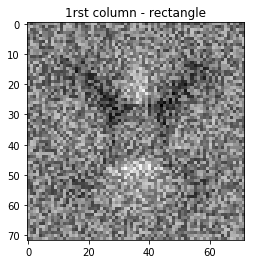

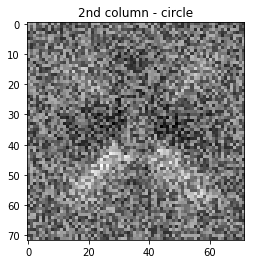

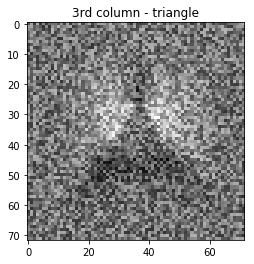

In [13]:
#Model weights
W,b = model.get_weights()
##### Visualization of the solution
plt.figure(1)
plt.imshow(W[:,0].reshape(72,72), cmap='gray')
plt.title('1rst column - rectangle')
plt.savefig('1rstcolumn.png', dpi=500)

plt.figure(2)
plt.imshow(W[:,1].reshape(72,72), cmap='gray')
plt.title('2nd column - circle')
plt.savefig('2ndcolumn.png', dpi=500)

plt.figure(3)
plt.imshow(W[:,2].reshape(72,72), cmap='gray')
plt.title('3rd column - triangle')
plt.savefig('3rdcolumn.png', dpi=500)

### More Difficult classification


[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()
Y_train_categorical = keras.utils.to_categorical(Y_train,3)
Y_test_categorical = keras.utils.to_categorical(Y_test,3)

In [15]:
history = model.fit(X_train, Y_train_categorical, epochs=10, batch_size=32,verbose=1)
score = model.evaluate(X_test, Y_test_categorical, verbose=0)
print('Test loss:', score[0])
print("Test %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Epoch 1/10
300/300 [==============================] - 0s 279us/step - loss: 1.0026 - acc: 0.5967
Epoch 2/10
300/300 [==============================] - 0s 236us/step - loss: 0.9688 - acc: 0.5878
Epoch 3/10
300/300 [==============================] - 0s 319us/step - loss: 0.8085 - acc: 0.6167
Epoch 4/10
300/300 [==============================] - 0s 362us/step - loss: 0.8484 - acc: 0.6300
Epoch 5/10
300/300 [==============================] - 0s 379us/step - loss: 0.6602 - acc: 0.6767
Epoch 6/10
300/300 [==============================] - 0s 412us/step - loss: 0.6314 - acc: 0.6733
Epoch 7/10
300/300 [==============================] - 0s 289us/step - loss: 0.5937 - acc: 0.6956
Epoch 8/10
300/300 [==============================] - 0s 213us/step - loss: 0.5497 - acc: 0.7067
Epoch 9/10
300/300 [==============================] - 0s 223us/step - loss: 0.5926 - acc: 0.6944
Epoch 10/10
300/300 [==============================] - 0s 196us/step - loss: 0.5838 - acc: 0.7244
Test loss: 0.5998546059926351

In [16]:
# create model
model_cnn = Sequential()

model_cnn.add(Conv2D(16,(5,5),activation = 'relu',input_shape= (72,72,1),name="conv2d_1"))
model_cnn.add(MaxPooling2D(pool_size=(5,5),name="max_pooling2d_1"))
model_cnn.add(Flatten(name="flatten_1"))
model_cnn.add(Dense(3, activation='softmax',name="dense_softmax"))

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_softmax (Dense)        (None, 3)                 8115      
Total params: 8,531
Trainable params: 8,531
Non-trainable params: 0
_________________________________________________________________


In [17]:
X_train = X_train.reshape((-1, 72, 72, 1))
X_test = X_test.reshape((-1, 72, 72, 1))

In [18]:
history = model_cnn.fit(X_train, Y_train_categorical, epochs=10, batch_size=16,verbose=1)
score = model_cnn.evaluate(X_test, Y_test_categorical, verbose=0)
print('Test loss:', score[0])
print("Test %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 8ms/step - loss: 1.2175 - acc: 0.3867
Epoch 2/10
300/300 [==============================] - 0s 598us/step - loss: 1.0338 - acc: 0.4833
Epoch 3/10
300/300 [==============================] - 0s 615us/step - loss: 0.9554 - acc: 0.5533
Epoch 4/10
300/300 [==============================] - 0s 648us/step - loss: 0.8834 - acc: 0.6700
Epoch 5/10
300/300 [==============================] - 0s 751us/step - loss: 0.8330 - acc: 0.6400
Epoch 6/10
300/300 [==============================] - 0s 562us/step - loss: 0.7707 - acc: 0.7400
Epoch 7/10
300/300 [==============================] - 0s 874us/step - loss: 0.7150 - acc: 0.8000
Epoch 8/10
300/300 [==============================] - 0s 957us/step - loss: 0.6674 - acc: 0.7900
Epoch 9/10
300/300 [==============================] - 0s 775us/step - loss: 0.6283 - acc: 0.7933
Epoch 10/10
300/300 [==============================] - 0s 748us/step - loss: 0.6178 - acc: 0.7733
Test loss: 0.7571488229433695
T

### A Regression problem

In [19]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


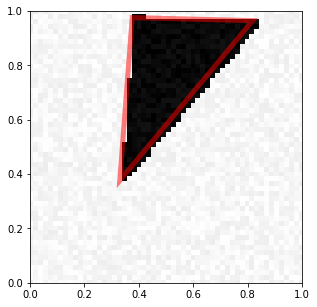

In [20]:
#Normalize the data with sklearn 
scaler = StandardScaler()
Y_train_normalize = scaler.fit_transform(Y_train)
Y_test_normalize = scaler.transform(Y_test)
#Visualize first training sample
visualize_prediction(X_train[0], Y_train[0])

In [21]:
# create model
model = Sequential()
model.add(Dense(6, input_shape=(X_train.shape[1],)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 31110     
Total params: 31,110
Trainable params: 31,110
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
# Fit the model
history = model.fit(X_train, Y_train_normalize, epochs=100, batch_size=32,verbose=1, validation_data=(X_test, Y_test_normalize))
score = model.evaluate(X_test, Y_test_normalize, verbose=0)
print('Test loss:', score)

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 1ms/step - loss: 3.9263 - val_loss: 1.7254
Epoch 2/100
300/300 [==============================] - 0s 326us/step - loss: 2.0122 - val_loss: 1.3068
Epoch 3/100
300/300 [==============================] - 0s 339us/step - loss: 1.2764 - val_loss: 1.2150
Epoch 4/100
300/300 [==============================] - 0s 312us/step - loss: 1.2690 - val_loss: 1.1523
Epoch 5/100
300/300 [==============================] - 0s 316us/step - loss: 1.1068 - val_loss: 1.0790
Epoch 6/100
300/300 [==============================] - 0s 312us/step - loss: 1.0055 - val_loss: 1.0029
Epoch 7/100
300/300 [==============================] - 0s 309us/step - loss: 0.9422 - val_loss: 0.9023
Epoch 8/100
300/300 [==============================] - 0s 289us/step - loss: 0.9182 - val_loss: 0.9692
Epoch 9/100
300/300 [==============================] - 0s 306us/step - loss: 0.9122 - val_loss: 0.9893
Epoch 10/100
300/300 [=======

300/300 [==============================] - 0s 322us/step - loss: 0.5154 - val_loss: 1.0281
Epoch 80/100
300/300 [==============================] - 0s 416us/step - loss: 0.5240 - val_loss: 1.0264
Epoch 81/100
300/300 [==============================] - 0s 459us/step - loss: 0.5145 - val_loss: 1.0054
Epoch 82/100
300/300 [==============================] - 0s 479us/step - loss: 0.5313 - val_loss: 0.9666
Epoch 83/100
300/300 [==============================] - 0s 376us/step - loss: 0.5871 - val_loss: 1.1753
Epoch 84/100
300/300 [==============================] - 0s 289us/step - loss: 0.5785 - val_loss: 1.0756
Epoch 85/100
300/300 [==============================] - 0s 293us/step - loss: 0.5500 - val_loss: 1.0057
Epoch 86/100
300/300 [==============================] - 0s 292us/step - loss: 0.4710 - val_loss: 0.9522
Epoch 87/100
300/300 [==============================] - 0s 346us/step - loss: 0.4955 - val_loss: 1.1270
Epoch 88/100
300/300 [==============================] - 0s 485us/step - loss:

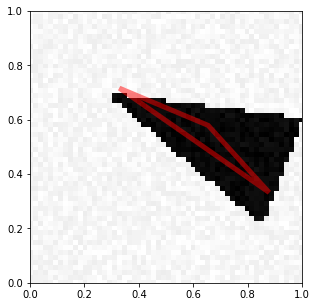

In [27]:
predictions_test = model.predict(X_test)

Y_pred = scaler.inverse_transform(predictions_test)
visualize_prediction(X_test[10], Y_pred[10])

In [28]:
def aux(Y):
    Yr = Y.reshape(-1, 3, 2)
    Yc = Yr.copy()
    Sorted_indexes = np.argsort(Y[:, ::2], axis=1)
    for i, j in enumerate(Sorted_indexes):
        Yc[i, :] = Yc[i,j]
    
    return Yc.reshape(-1, 6)

In [29]:
[X_train, Y_train] = generate_dataset_regression(3000, 20)
[X_test, Y_test] = generate_test_set_regression()
X_train=X_train.reshape(X_train.shape[0],72,72,1)
X_train=X_train.astype('float32')
X_test=X_test.reshape(X_test.shape[0],72,72,1)
X_test=X_test.astype('float32')
Y_train=sort_triangles(Y_train)
Y_test=sort_triangles(Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

NameError: name 'sort_triangles' is not defined

In [30]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6,activation="softmax"))
model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=1e-3, beta_1=0.7, beta_2=0.999, epsilon=1e-08),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [31]:
model.fit(X_train,Y_train,epochs=50,batch_size=128)

Epoch 1/50
3000/3000 [==============================] - 3s 893us/step - loss: 0.1884 - acc: 0.2447
Epoch 2/50
3000/3000 [==============================] - 1s 416us/step - loss: 0.1836 - acc: 0.2713
Epoch 3/50
3000/3000 [==============================] - 1s 419us/step - loss: 0.1832 - acc: 0.2823
Epoch 4/50
3000/3000 [==============================] - 1s 424us/step - loss: 0.1832 - acc: 0.2790
Epoch 5/50
3000/3000 [==============================] - 1s 419us/step - loss: 0.1828 - acc: 0.2860
Epoch 6/50
3000/3000 [==============================] - 1s 422us/step - loss: 0.1819 - acc: 0.3083
Epoch 7/50
3000/3000 [==============================] - 1s 418us/step - loss: 0.1808 - acc: 0.3427
Epoch 8/50
3000/3000 [==============================] - 1s 421us/step - loss: 0.1790 - acc: 0.3773
Epoch 9/50
3000/3000 [==============================] - 1s 421us/step - loss: 0.1768 - acc: 0.3963
Epoch 10/50
3000/3000 [==============================] - 1s 445us/step - loss: 0.1738 - acc: 0.4273
Epoch 11/

300/300 [==============================] - 0s 678us/step


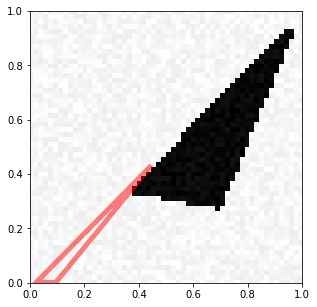

In [32]:
#Visualize prediction for one test image
model.evaluate(X_test,Y_test)
visualize_prediction(X_test[0], model.predict(X_test)[0])

### Denoising task

In [ ]:
X_train_noise,Y_train_noise = generate_dataset_noise(5000) 
X_test_noise,Y_test_noise = generate_test_set_noise() 


X_train_noise = X_train_noise.reshape((-1,72,72,1))
Y_train_noise = Y_train_noise.reshape((-1,72,72,1))

X_test_noise = X_test_noise.reshape((-1,72,72,1))
Y_test_noise = Y_test_noise.reshape((-1,72,72,1))